In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

#For plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import norm
sns.set()

In [2]:
from datetime import datetime,timedelta


In [33]:
bookings_SIS = pd.read_csv('Data\SIS_bookings_1102.csv')
bookings_SOB = pd.read_csv('Data\LKCSB_bookings_1102.csv')
bookings_SOA = pd.read_csv('Data\SOA_bookings_1102.csv')
bookings_SOE = pd.read_csv('Data\SOE_bookings_1102.csv')
bookings_SOL = pd.read_csv('Data\SOL_bookings_1102.csv')
bookings = pd.concat([bookings_SIS,bookings_SOB,bookings_SOA,bookings_SOE,bookings_SOL])




In [34]:
bookings

,Unnamed: 0,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking
0,0,"11 February 2020, Tuesday",SIS GSR 2-1,19:00-21:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
1,1,"11 February 2020, Tuesday",SIS GSR 2-2,11:30-15:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting
2,2,"11 February 2020, Tuesday",SIS GSR 2-2,15:30-19:30,Confirmed,BK-20200203-001315,"CHUA ZHI NING, CHARLOTTE",Student,znchua.2019@sis.smu.edu.sg,AdHoc,study
3,3,"11 February 2020, Tuesday",SIS GSR 2-3,12:00-15:00,Confirmed,BK-20200129-001198,LIM JIA WEN,Student,jiawen.lim.2018@business.smu.edu.sg,AdHoc,study
4,4,"11 February 2020, Tuesday",SIS GSR 2-3,15:00-17:00,Confirmed,BK-20200210-001217,"LEK JAN YEE, LOIS",Student,lois.lek.2018@sis.smu.edu.sg,AdHoc,Meeting
...,...,...,...,...,...,...,...,...,...,...,...
674,674,"29 January 2020, Wednesday",SOL-B1.11-GS,16:00-17:00,Confirmed,BK-20200128-000154,NATALIE SHAUNA TAN,Student,natalietan.2019@business.smu.edu.sg,Academic,Meeting
675,675,"29 January 2020, Wednesday",SOL-B1.11-GS,17:00-18:30,Confirmed,BK-20200127-000085,"CHENG SIN HUI, CHELSEA",Student,shcheng.2017@socsc.smu.edu.sg,AdHoc,meeting
676,676,"29 January 2020, Wednesday",SOL-B1.11-GS,18:30-21:30,Confirmed,BK-20200128-001211,MOHAMED SHAFIE BIN ALLAMEEN,Student,mohamedsa.2017@law.smu.edu.sg,AdHoc,meeting
677,677,"29 January 2020, Wednesday",SOL-B1.12-GS,12:00-16:00,Confirmed,BK-20200115-000789,DARRYL HOR JUN HENG,Student,darryl.hor.2018@law.smu.edu.sg,AdHoc,study


In [6]:
# bookings['2']

In [25]:
bookings.count()

Unnamed: 0                       5308
Day                              5308
Facility                         5308
Booking Time                     5308
Booking Status                   5308
Booking Reference Number         5308
Booked for User Name             5308
Booked for User Org Unit         5308
Booked for User Email Address    5308
Use Type                         5308
Purpose of Booking               5308
dtype: int64

In [8]:
# bookings = bookings.rename(columns={'0' : 'Day', '1': 'Facility', '2':'Booking Time', '3': 'Purpose'})

In [35]:
bookings = bookings.drop(columns='Unnamed: 0')

In [10]:
# bookings = bookings.drop(bookings.index[0])

,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking


In [ ]:
# bookings[]

In [12]:
# bookings[bookings['Purpose'] =='Student'].count()

KeyError: 'Purpose'

In [37]:
bookings['Facility'].unique()

array(['SIS GSR 2-1', 'SIS GSR 2-2', 'SIS GSR 2-3', 'SIS GSR 2-4',
       'SIS GSR 2-5', 'SIS GSR 2-6', 'SIS GSR 2-7', 'SIS GSR 3-1',
       'SIS GSR 3-2', 'SIS GSR 3-3', 'SIS GSR 3-4', 'SIS GSR 3-5',
       'SIS GSR 3-6', 'LKCSB GSR 1-1', 'LKCSB GSR 1-2', 'LKCSB GSR 2-1',
       'LKCSB GSR 2-10', 'LKCSB GSR 2-11', 'LKCSB GSR 2-12',
       'LKCSB GSR 2-13', 'LKCSB GSR 2-14', 'LKCSB GSR 2-15',
       'LKCSB GSR 2-16', 'LKCSB GSR 2-17', 'LKCSB GSR 2-18',
       'LKCSB GSR 2-19', 'LKCSB GSR 2-2', 'LKCSB GSR 2-20',
       'LKCSB GSR 2-21', 'LKCSB GSR 2-22', 'LKCSB GSR 2-23',
       'LKCSB GSR 2-24', 'LKCSB GSR 2-25', 'LKCSB GSR 2-3',
       'LKCSB GSR 2-4', 'LKCSB GSR 2-5', 'LKCSB GSR 2-6', 'LKCSB GSR 2-7',
       'LKCSB GSR 2-8', 'LKCSB GSR 2-9', 'LKCSB GSR 3-1',
       'LKCSB GSR 3-11', 'LKCSB GSR 3-12', 'LKCSB GSR 3-13',
       'LKCSB GSR 3-14', 'LKCSB GSR 3-15', 'LKCSB GSR 3-16',
       'LKCSB GSR 3-17', 'LKCSB GSR 3-18', 'LKCSB GSR 3-19',
       'LKCSB GSR 3-2', 'LKCSB GSR 3-20', 'LKC

In [15]:
# bookings['Purpose'].unique()

KeyError: 'Purpose'

In [38]:
bookings['Booking Time'].unique()

array(['19:00-21:00', '11:30-15:30', '15:30-19:30', '12:00-15:00',
       '15:00-17:00', '17:00-21:00', '09:00-12:00', '15:30-18:30',
       '10:00-14:00', '14:00-18:00', '18:00-22:00', '10:00-12:00',
       '12:00-14:00', '12:00-16:00', '16:00-20:00', '08:30-11:30',
       '11:00-14:00', '14:00-17:00', '17:00-20:00', '09:30-12:00',
       '20:00-22:30', '11:00-12:00', '15:30-19:00', '11:30-15:00',
       '15:00-19:00', '19:00-22:30', '16:30-20:00', '12:00-15:30',
       '15:30-17:00', '16:00-18:30', '18:30-22:00', '08:30-12:00',
       '15:00-18:00', '13:00-17:00', '11:00-15:00', '10:00-13:00',
       '14:30-17:00', '09:30-13:00', '13:00-16:00', '10:30-14:30',
       '09:00-13:00', '09:00-12:30', '12:00-13:00', '18:00-21:30',
       '10:30-11:30', '12:30-13:30', '14:00-15:00', '15:30-16:30',
       '16:30-18:00', '08:30-12:30', '12:30-16:30', '16:30-18:30',
       '19:30-22:00', '16:00-19:00', '19:00-22:00', '11:30-14:00',
       '15:00-17:30', '19:00-21:30', '08:30-10:00', '12:00-13:

In [39]:
def get_half_hr_iterations(time_range):
    """
    Given string of booking time-range eg '1030-1200', return the number of 30minutes interval 
    between them eg ['0800-1030', '1200-1400','1630-2230']
    
    hold_start_and_end_timings -> list of start and end timings
    
    time_object_1 & time_object_2 -> converts the start and end timings to datetime.time objects
    whether the day is a weekday or not. 8am to 1030pm
    
    start_booking_time_mins & end_booking_time_mins -> Convert the booking timings into minutes for calculation
    of the number of 30 minutes interval. e.g. 240 minutes -> 4 hours -> 8 thirty minute intervals

    """
    hold_start_and_end_timings = time_range.split('-')
    time_object_1 = datetime.strptime(hold_start_and_end_timings[0],'%H:%M').time()
    time_object_2 = datetime.strptime(hold_start_and_end_timings[1],'%H:%M').time()
    h1, m1, s1 = time_object_1.hour, time_object_1.minute, time_object_1.second
    h2, m2, s2 = time_object_2.hour, time_object_2.minute, time_object_2.second
    
    start_booking_time_mins = (m1 + 60*h1) 
    end_booking_time_mins = (m2 + 60*h2)
    
    return int((end_booking_time_mins - start_booking_time_mins)/60/0.5)


print(get_half_hr_iterations('08:30-12:30'))

# bookings['Booking Time'].apply(get_half_hr_iterations())

8


In [40]:
def expand_df_based_on_intervals(bookings):
    """
    Given a dataframe containing bookings in time-ranges e.g. 08:30-09:30, 
    returns a new dataframe after expanding the timing into 
    30 minutes interval -> 08:30, 09:00, 09:30. 
    This is done for every row of facility booking.
    
    new_bookings -> new pandas DataFrame to hold the expanded time-ranges based on 30 minutes interval. 
    To be returned at the end.
    
    num_iter -> Given string of booking time-range eg '1030-1200', return the number of 30 minutes interval 
    between them eg ['0800-1030', '1200-1400','1630-2230']
    
    hold_time -> String which holds the starttime after splitting the time-range by '-'. e.g. '08:30-10:30 -> 08:30'
    """

    new_bookings = pd.DataFrame(columns=['Day','Facility','Booking Time','Booking Status', 'Booking Reference Number', 
                                         'Booked for User Name', 'Booked for User Org Unit', 'Booked for User Email Address',
                                        'Use Type', 'Purpose of Booking']) #new df to hold the intervals

    for index,columns in bookings.iterrows():
        num_iter = get_half_hr_iterations(columns['Booking Time']) #generates 30 minutes interval
        hold_time = columns['Booking Time'].split('-')
        hold_time = hold_time[0]

        for i in range(num_iter):
            #add a new row of record into the new df
            new_bookings.loc[len(new_bookings)] = [columns['Day'], columns['Facility'], hold_time, columns['Booking Status'],
                                                  columns['Booking Reference Number'],columns['Booked for User Name'],
                                                   columns['Booked for User Org Unit'],columns['Booked for User Email Address'],
                                                  columns['Use Type'],columns['Purpose of Booking']] 
            
            #add 30 minutes to the previous timing added into the new df
            hold_time = datetime.strptime(hold_time,'%H:%M')+ timedelta(minutes=30) 
            
            #the hold_time variable is now a datetime object because timedelta cannot be used on datetime.time() objects
            #so, we convert it back to timings as we do not need the date
            hold_time = hold_time.strftime("%H:%M")
            
    return new_bookings

test = expand_df_based_on_intervals(bookings)
#plot timings based on how many rows for each timing
#popular facilities/GSR from the schools

#relationship between the school booker is from vs the school which booker booked in

#forecasting(?????)

#do analysis with SR vs without SR to see differences/trends

# clustering model (unsupervised) --> based on frequency and amt of times they book. 
#Can analyse clusters to find out what sch they are from and rough timings they booked

#

#pd.grouper() to groupby weeks, frequency = w





In [41]:
test.head()

,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking
0,"11 February 2020, Tuesday",SIS GSR 2-1,19:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
1,"11 February 2020, Tuesday",SIS GSR 2-1,19:30,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
2,"11 February 2020, Tuesday",SIS GSR 2-1,20:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
3,"11 February 2020, Tuesday",SIS GSR 2-1,20:30,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
4,"11 February 2020, Tuesday",SIS GSR 2-2,11:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting


In [ ]:
# new_bookings.describe()
# new_bookings.info()

In [42]:
bookings_time = bookings.groupby('Booking Time').size()
bookings_time

Booking Time
08:30-09:30     1
08:30-10:00    16
08:30-10:30     2
08:30-11:00     5
08:30-11:30    19
               ..
20:30-22:00     2
20:30-22:30     9
21:00-22:00     1
21:00-22:30     4
22:00-22:30     1
Length: 199, dtype: int64

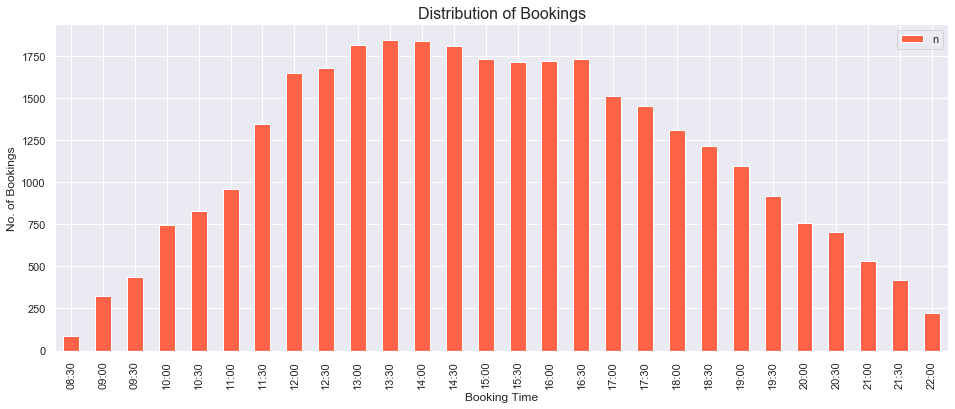

In [43]:
bookings_time = test.groupby('Booking Time').size().reset_index(name='n')

fig, ax = plt.subplots()
bookings_time.plot(kind='bar', x='Booking Time', y='n', ax=ax, figsize=(16, 6), color='tomato',)
ax.set_ylabel("No. of Bookings")
ax.set_xlabel("Booking Time")
plt.title("Distribution of Bookings", fontsize=16)
plt.show()

In [ ]:
def filter_(x):
    if '15:30' in x:
        r = 1
    else:
        r = 0
    return r

In [ ]:
bookings['15:30'] = bookings['Booking Time'].apply(filter_)

In [ ]:
bookings['15:30'].value_counts()

In [ ]:
bookings

In [ ]:
bookings['Purpose'].value_counts()